<h1>Extracting Stock Data Using a Python Library</h1>


In [ ]:
!pip install yfinance==0.2.4
#!pip install pandas==1.3.3
#!pip install beautifulsoup4

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Question 1 - Extracting Tesla Stock Data Using yfinance:

In [7]:


# Get Tesla stock data
tesla = yf.Ticker("TSLA")

# Extract historical stock information
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### Question 2 - Extracting Tesla Revenue Data Using Webscraping



In [14]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data  = requests.get(url).text

soup = BeautifulSoup(html_data, 'html5lib')

#We create an empty dataframe
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

#We extract the desired data from the 'soup' object and save it in the dataframe
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

#OPTIONAL: Execute the following lines to remove an null or empty strings in the Revenue column.
#tesla_revenue.dropna(inplace=True)
#tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

tesla_revenue.head()

<ipython-input-14-5434aa6dfa86>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
<ipython-input-14-5434aa6dfa86>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
<ipython-input-14-5434aa6dfa86>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
<ipython-input-14-5434aa6dfa86>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tesla_revenue = tesla_revenue.append({"Date":d

,Date,Revenue
0,2021,53823
1,2020,31536
2,2019,24578
3,2018,21461
4,2017,11759


### Question 3 - Extracting GameStop Corp. (GME) Stock Data Using yfinance

In [10]:
# Get GameStop  stock data
gamestop = yf.Ticker("GME")

# Extract historical stock information
gamestop_data = gamestop.history(period="max")
gamestop_data.reset_index(inplace=True)
gamestop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693349,1.603295,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


### Question 4 - Extracting GameStop Revenue Data Using Webscraping

In [11]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

html_data  = requests.get(url).text
soup = BeautifulSoup(html_data)
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Revenue = col[1].text

    # Finally we append the data of each row to the table
    gme_revenue = gme_revenue.append({"Date":date, "Revenue":Revenue}, ignore_index=True)

    gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")




gme_revenue.head()

<ipython-input-11-758d0c561cac>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gme_revenue = gme_revenue.append({"Date":date, "Revenue":Revenue}, ignore_index=True)
<ipython-input-11-758d0c561cac>:17: FutureWarning: The default value of regex will change from True to False in a future version.
  gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")
<ipython-input-11-758d0c561cac>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gme_revenue = gme_revenue.append({"Date":date, "Revenue":Revenue}, ignore_index=True)
<ipython-input-11-758d0c561cac>:17: FutureWarning: The default value of regex will change from True to False in a future version.
  gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")
<ipython-input-11-758d0c561cac>:15: FutureWarning: The frame.append method is de

,Date,Revenue
0,2020,6466
1,2019,8285
2,2018,8547
3,2017,7965
4,2016,9364


## Methode pour afficher les graphes

In [5]:
import matplotlib.pyplot as plt

def make_graph_matplotlib(stock_data, revenue_data, stock):
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 9))

    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']

    # Plot share price
    ax1.plot(pd.to_datetime(stock_data_specific.Date), stock_data_specific.Close, label="Share Price")
    ax1.set_ylabel("Price ($US)")
    ax1.set_title("Historical Share Price")

    # Plot revenue
    ax2.plot(pd.to_datetime(revenue_data_specific.Date), revenue_data_specific.Revenue, label="Revenue")
    ax2.set_ylabel("Revenue ($US Millions)")
    ax2.set_title("Historical Revenue")

    # Shared x-axis
    ax2.set_xlabel("Date")

    # Overall figure settings
    fig.suptitle(stock)
    fig.tight_layout()
    plt.show()

### Question 5 - TESLA Stock and Revenue Dashboard

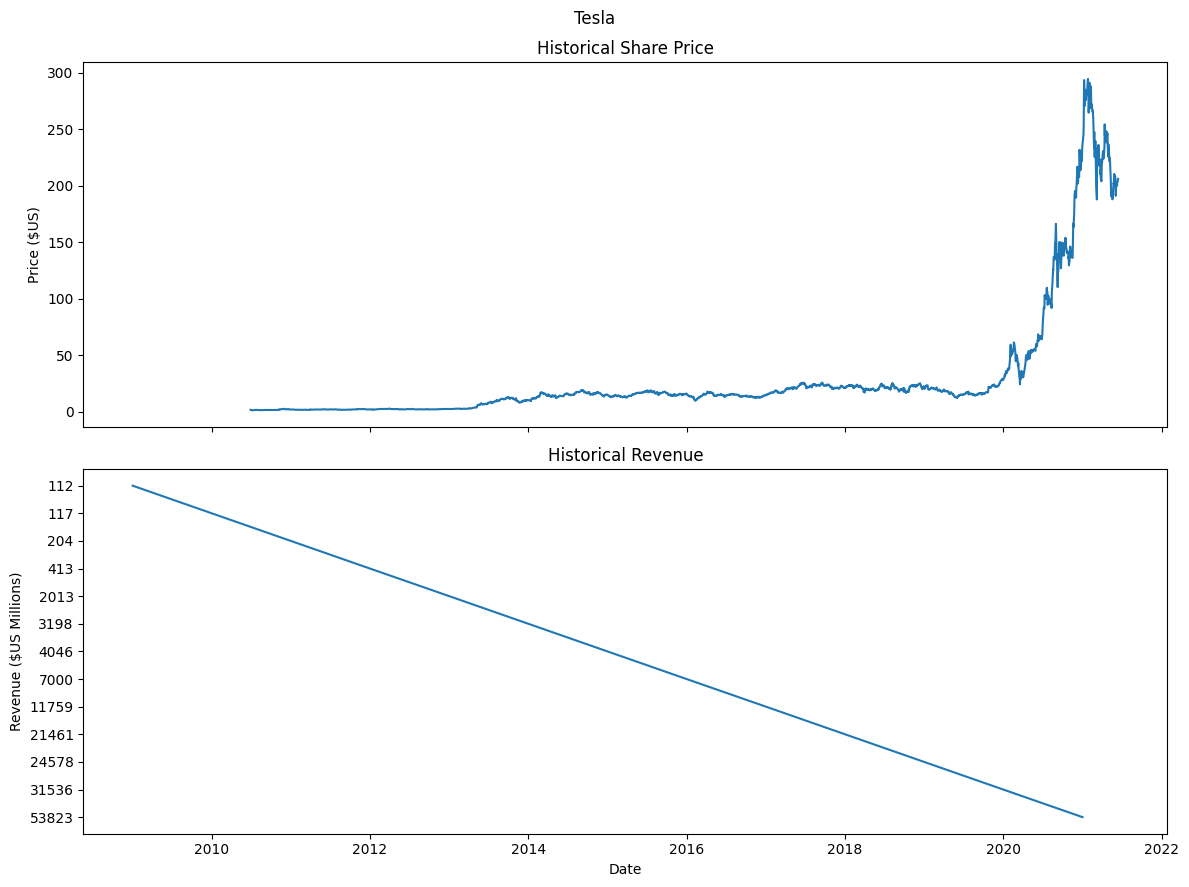

In [9]:
make_graph_matplotlib(tesla_data, tesla_revenue, 'Tesla')

### Question 6 - GameStop Stock and Revenue Dashboard

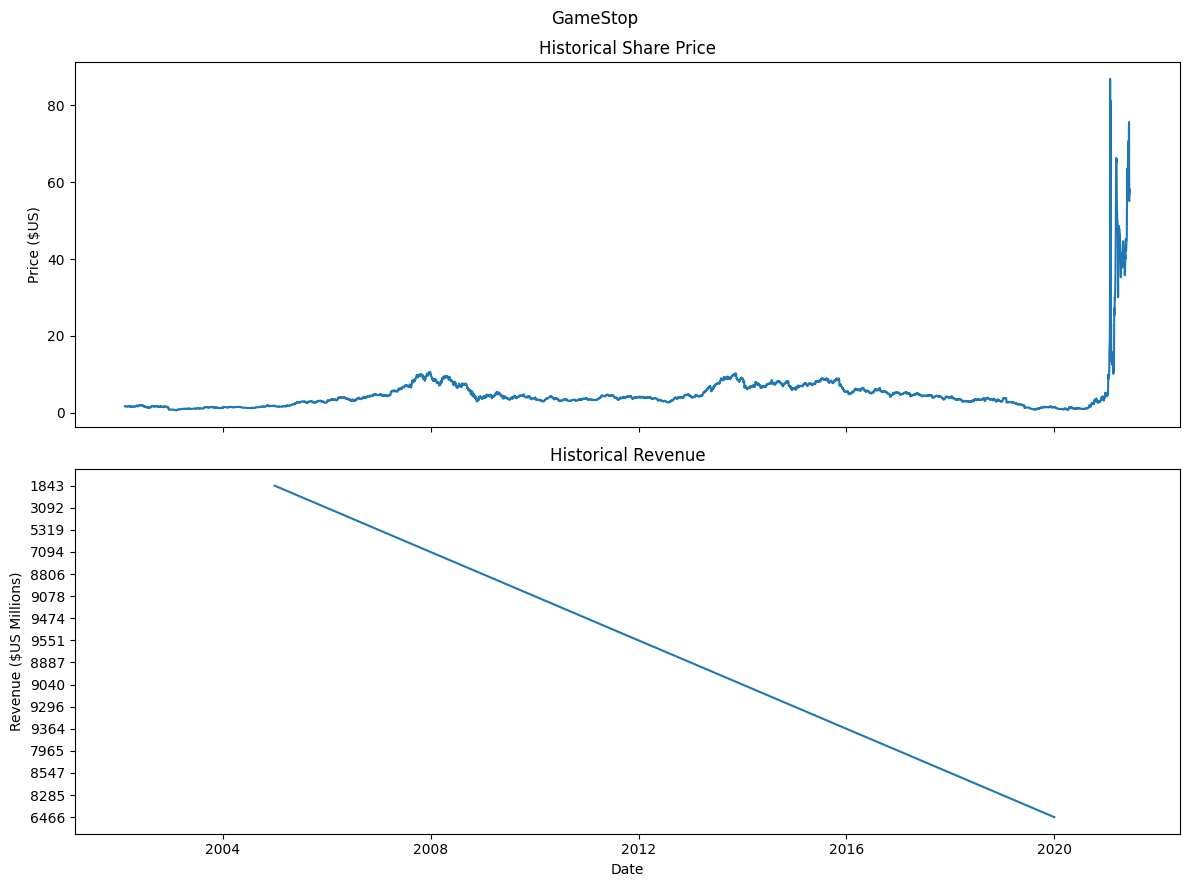

In [13]:
make_graph_matplotlib(gamestop_data,gme_revenue,'GameStop')